In [1]:
1

1

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# univariate analysis

In [10]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [23]:
df[df['Churn']=='No'].count()
df[df['Churn']=='Yes'].count()

customerID          1869
gender              1869
SeniorCitizen       1869
Partner             1869
Dependents          1869
tenure              1869
PhoneService        1869
MultipleLines       1869
InternetService     1869
OnlineSecurity      1869
OnlineBackup        1869
DeviceProtection    1869
TechSupport         1869
StreamingTV         1869
StreamingMovies     1869
Contract            1869
PaperlessBilling    1869
PaymentMethod       1869
MonthlyCharges      1869
TotalCharges        1869
Churn               1869
dtype: int64

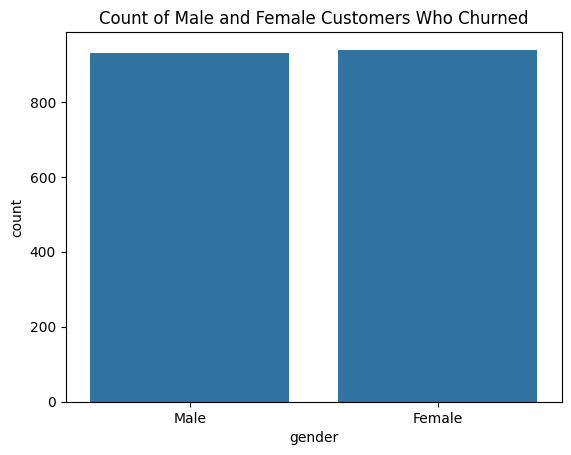

In [26]:
sns.countplot(x='gender', data=df[df['Churn'] == 'Yes'])
plt.title("Count of Male and Female Customers Who Churned")
plt.show()

In [27]:
## there seems to be not much difference in the count of male and female customers just yet

In [28]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [30]:
df['Contract'].value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

<Axes: xlabel='Contract', ylabel='count'>

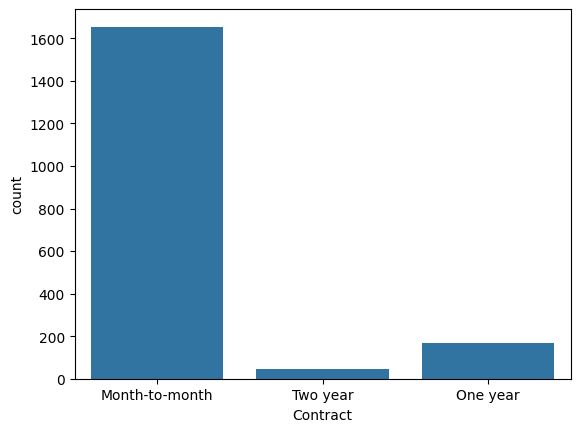

In [31]:
sns.countplot(x ='Contract', data = df[df['Churn']=='Yes'])

In [32]:
## most of the people churning are from month-to-month contract

In [35]:
df[df['Churn']=='Yes'].describe()

,SeniorCitizen,tenure,MonthlyCharges
count,1869.000000,1869.000000,1869.000000
mean,0.254682,17.979133,74.441332
std,0.435799,19.531123,24.666053
min,0.000000,1.000000,18.850000
25%,0.000000,2.000000,56.150000
50%,0.000000,10.000000,79.650000
75%,1.000000,29.000000,94.200000
max,1.000000,72.000000,118.350000


In [36]:
df[df['Churn']=='No'].describe()

,SeniorCitizen,tenure,MonthlyCharges
count,5174.000000,5174.000000,5174.000000
mean,0.128721,37.569965,61.265124
std,0.334923,24.113777,31.092648
min,0.000000,0.000000,18.250000
25%,0.000000,15.000000,25.100000
50%,0.000000,38.000000,64.425000
75%,0.000000,61.000000,88.400000
max,1.000000,72.000000,118.750000


# bivariate analysis

In [37]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [44]:
df['SeniorCitizen'].value_counts()

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

<Axes: xlabel='gender', ylabel='count'>

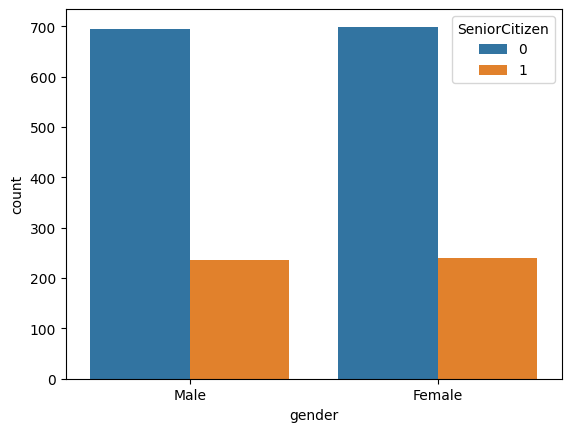

In [39]:
sns.countplot(x='gender',data = df[df['Churn']=='Yes'],hue = 'SeniorCitizen')

In [41]:
(df[df['SeniorCitizen']==0].count()/df.shape[0])*100

customerID          83.785319
gender              83.785319
SeniorCitizen       83.785319
Partner             83.785319
Dependents          83.785319
tenure              83.785319
PhoneService        83.785319
MultipleLines       83.785319
InternetService     83.785319
OnlineSecurity      83.785319
OnlineBackup        83.785319
DeviceProtection    83.785319
TechSupport         83.785319
StreamingTV         83.785319
StreamingMovies     83.785319
Contract            83.785319
PaperlessBilling    83.785319
PaymentMethod       83.785319
MonthlyCharges      83.785319
TotalCharges        83.785319
Churn               83.785319
dtype: float64

In [42]:
## as most of the people are  not senior citizen , there is no conclusive evidence that senior citizens churn less, though this might be true considering that older people tend to be less comfortable in changing their habits , there is no evidence here according to the data

<Axes: xlabel='tenure', ylabel='Count'>

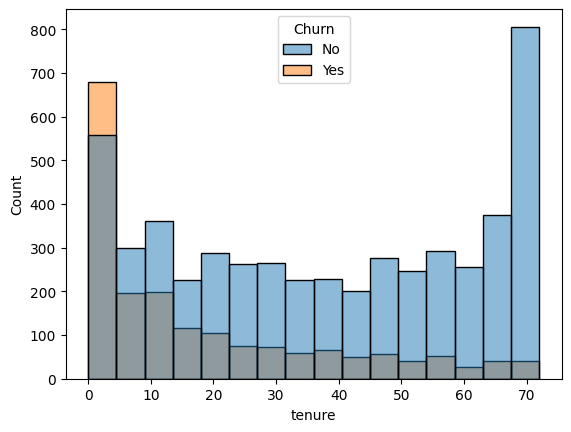

In [47]:
sns.histplot(x='tenure',data = df,hue='Churn')

In [48]:
## thhe longer the people stay , the less likely they are to churn , most people churn out in the first 5 months of their subscription

In [52]:
# Replace empty strings with NaN
df['TotalCharges'] = df['TotalCharges'].replace('', np.nan)
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)



# Convert column to numeric (handles NaNs automatically)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])


In [53]:
df['TotalCharges'].isnull().sum()

11

<Axes: xlabel='TotalCharges', ylabel='Churn'>

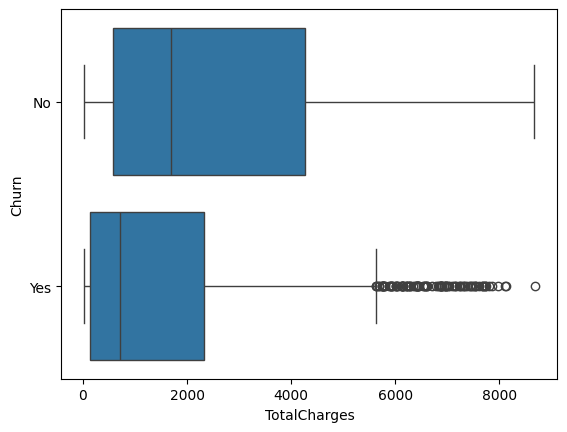

In [57]:
sns.boxplot(x='TotalCharges',y = 'Churn', data = df)

In [58]:
## most people churning have a lower total spend than the ones not churning, there are a lot of outliers, but outliers can obviously exist 

In [59]:
df.dropna(inplace=True)

In [60]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [61]:
df.drop(columns=['customerID'],axis=1,inplace=True)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

In [63]:
columns = df.columns.to_list()

In [64]:
columns

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

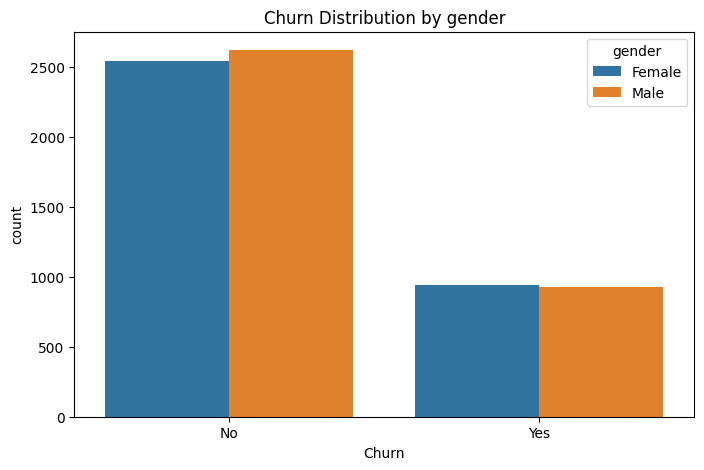

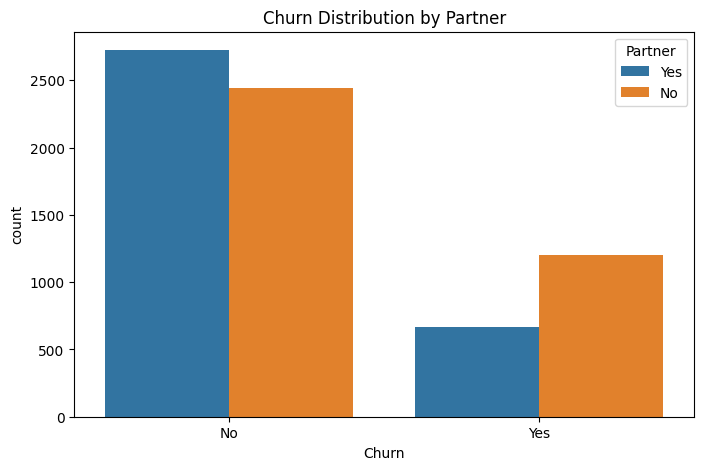

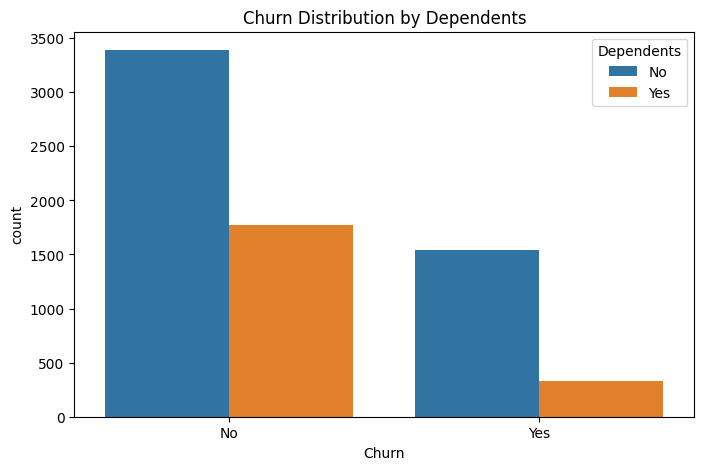

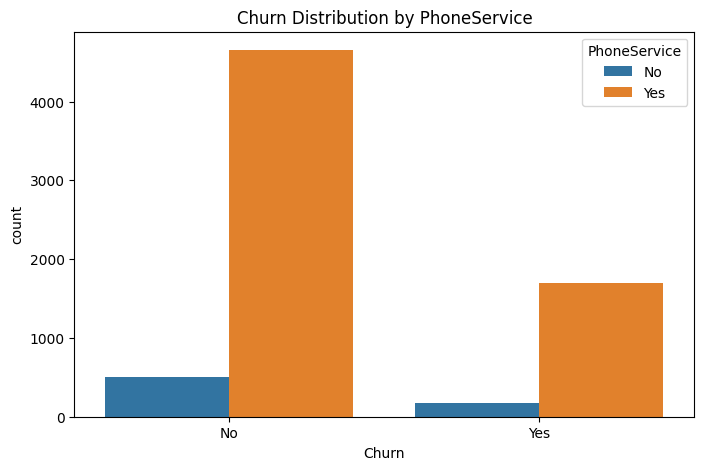

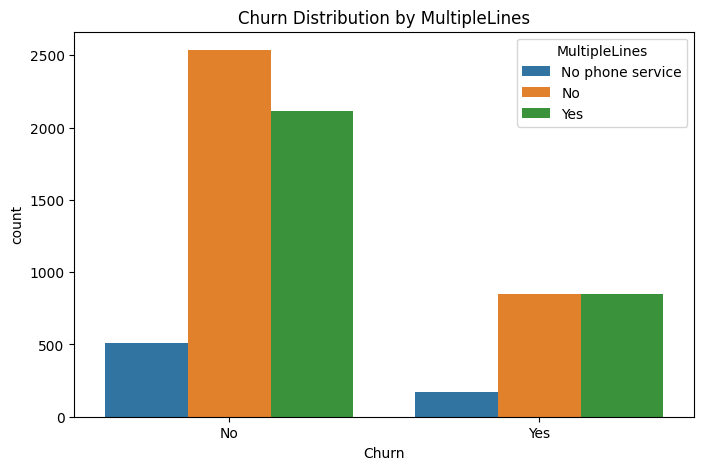

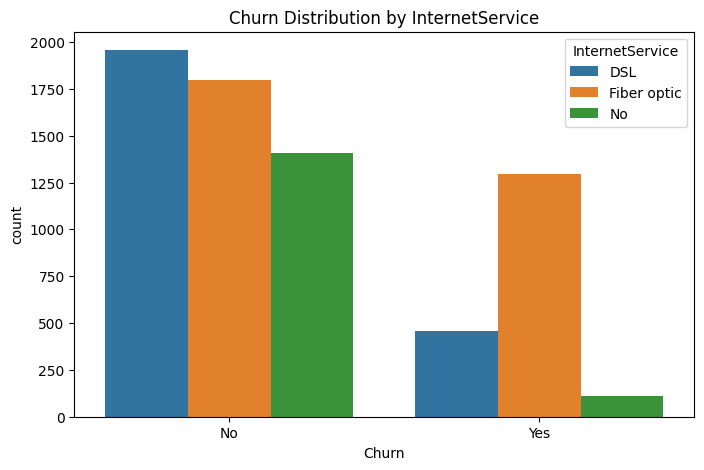

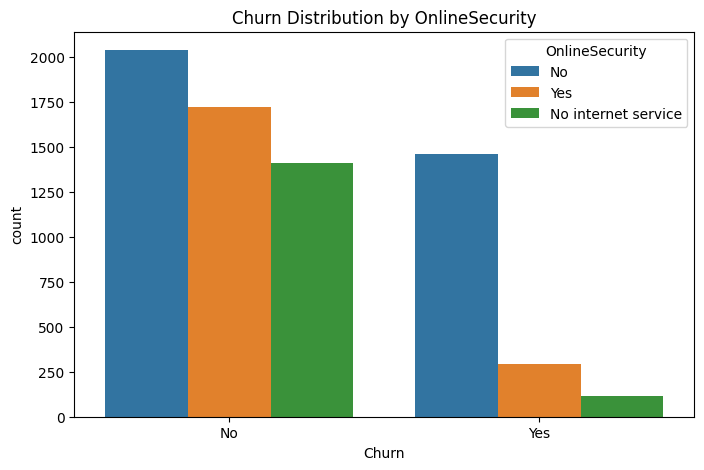

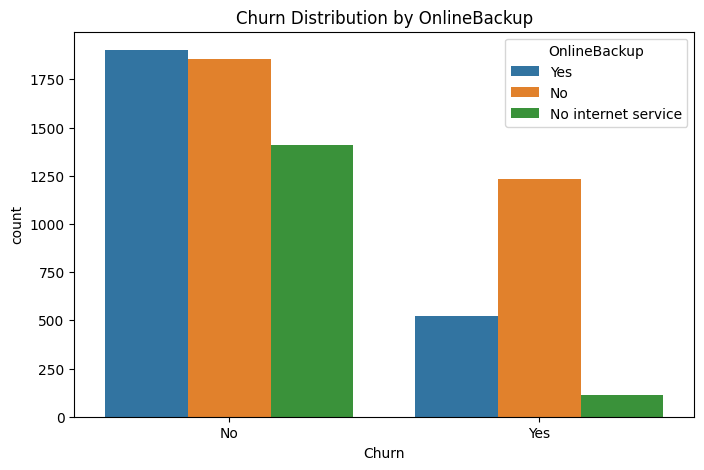

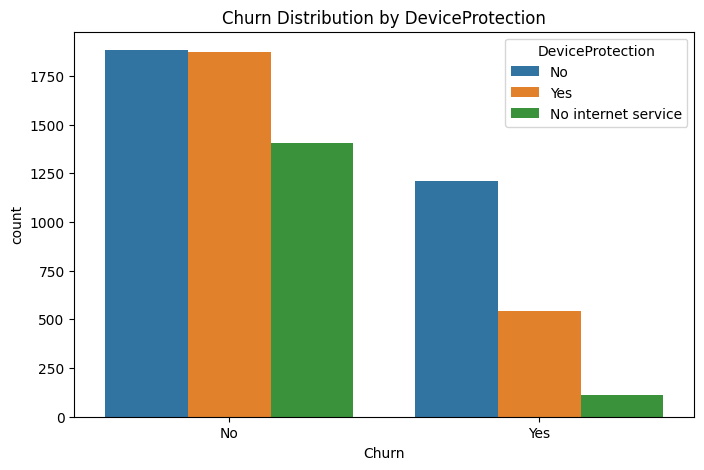

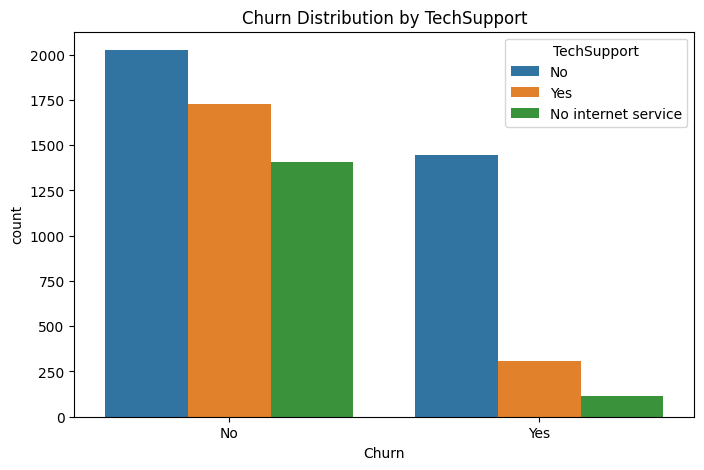

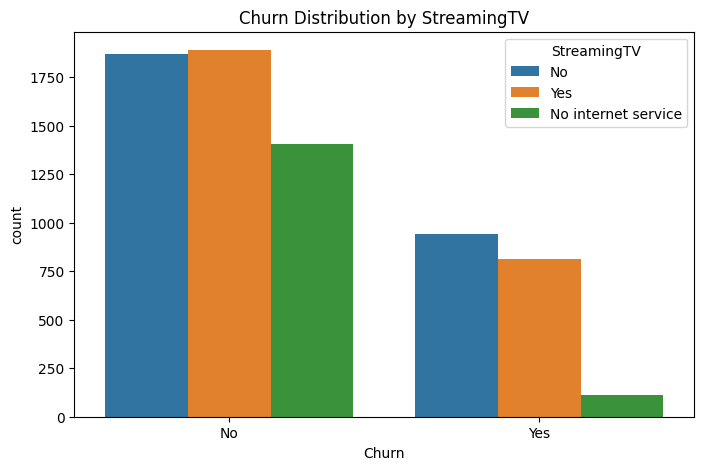

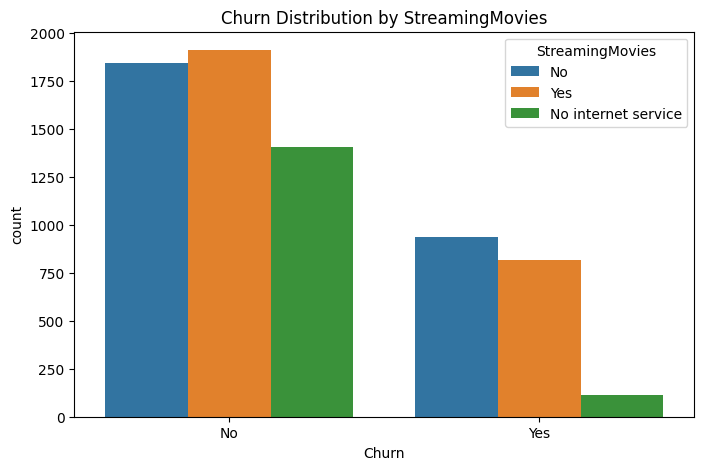

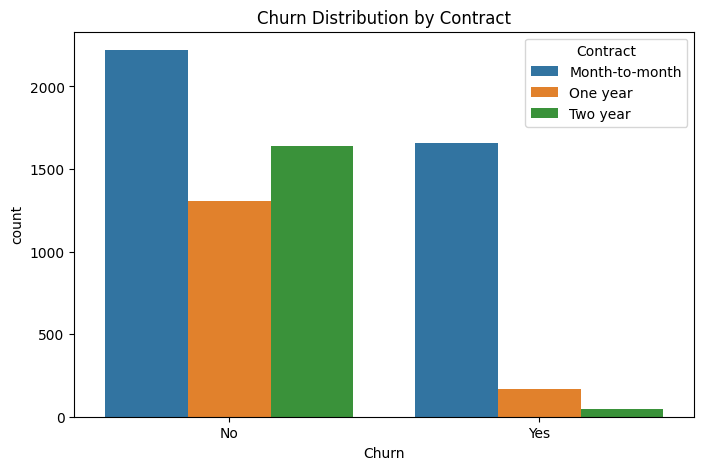

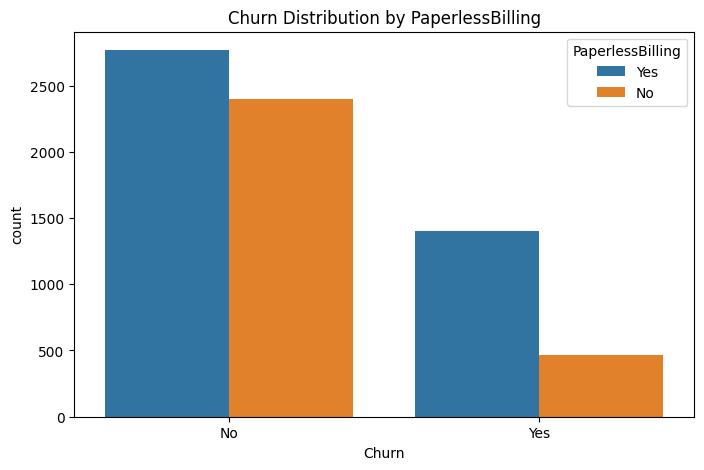

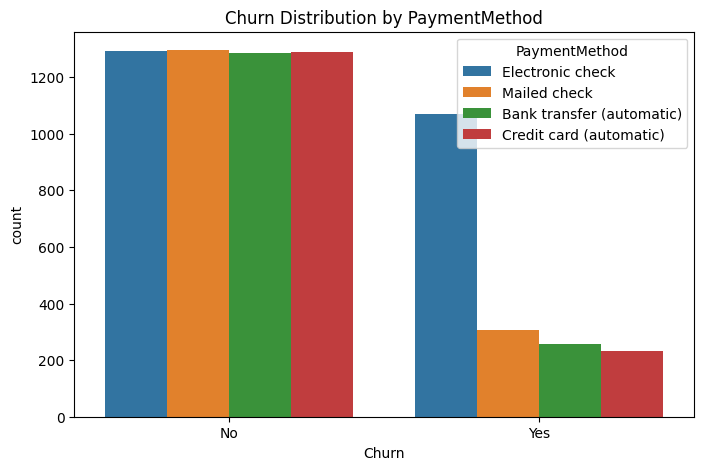

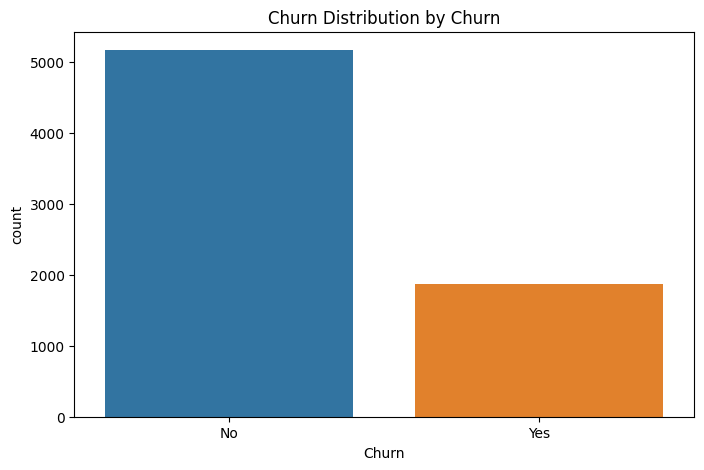

In [66]:
for item in columns:
    if df[item].dtype == object:
        plt.figure(figsize=(8, 5))  # Optional: Adjust figure size
        sns.countplot(x='Churn', data=df, hue=df[item])
        plt.title(f"Churn Distribution by {item}")  # Optional: Add title
        plt.show()  # Display the plot

In [67]:
df['Churn']=np.where(df['Churn']=='Yes',1,0)

In [68]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [69]:
df.to_csv('updated_data')